Title: Spotify playlist recommendation system.

Members:
  1. Vinay Shirole
  2. Aditya Agarkhed
  3. Kabir Chaturvedi

  Github: https://github.iu.edu/B565-Fall2023/project-kschatur-adiagark-vshirole

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing required libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy import sparse
import random
from sklearn.metrics.pairwise import cosine_similarity
import ast
from scipy.spatial.distance import cosine, euclidean, hamming
from sklearn.preprocessing import normalize
from time import time
from math import sqrt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
# Reading the musical data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify dataset/data.csv")
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
# # Reading the musical data
# data_with_genre = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify dataset/data_w_genres.csv")
# data_with_genre.head()

In [4]:
# Performing some data cleaning operations
data['artists'] = data['artists'].map(lambda x: x.lstrip('[').rstrip(']'))
data['artists'] = data['artists'].map(lambda x: x[1:-1])
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff', 'James Levine', 'Berline...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

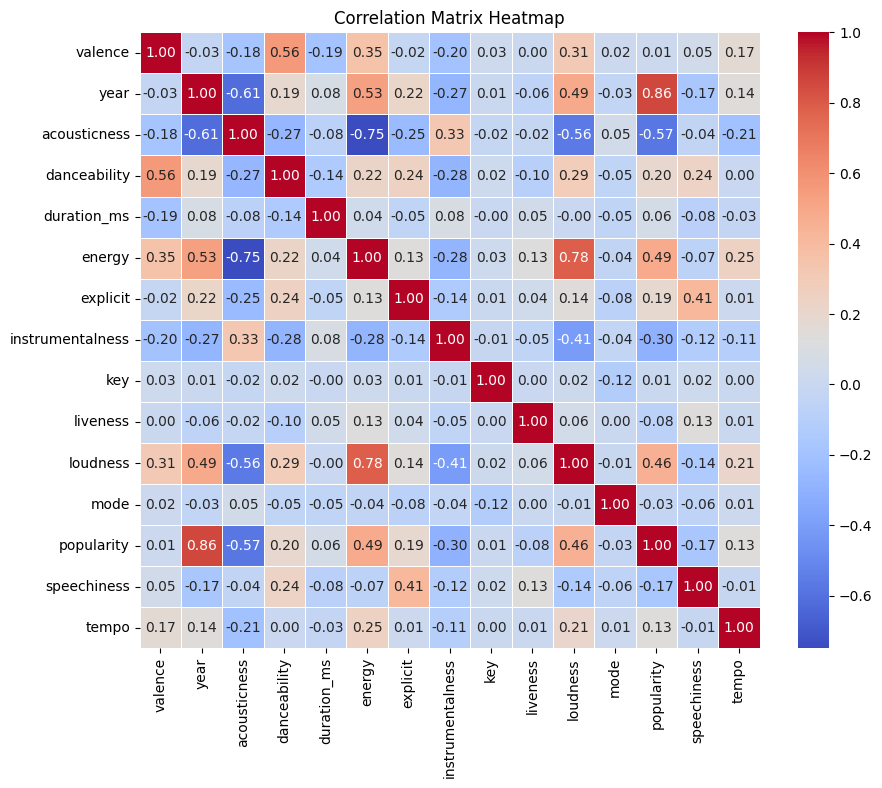

In [6]:
# Calculate the Pearson correlation matrix for the entire dataset
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [7]:
# Creating a piprline to apply Stndardisation and K-means before visualising the data after PCA
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=20,
                                   verbose=False))
                                 ], verbose=False)

X = data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data['cluster_label'] = song_cluster_labels

In [8]:
# Visualizing the Clusters with PCA
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = data['name']
projection['cluster'] = data['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Reading data by genre
genre_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify dataset/data_by_genres.csv')
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


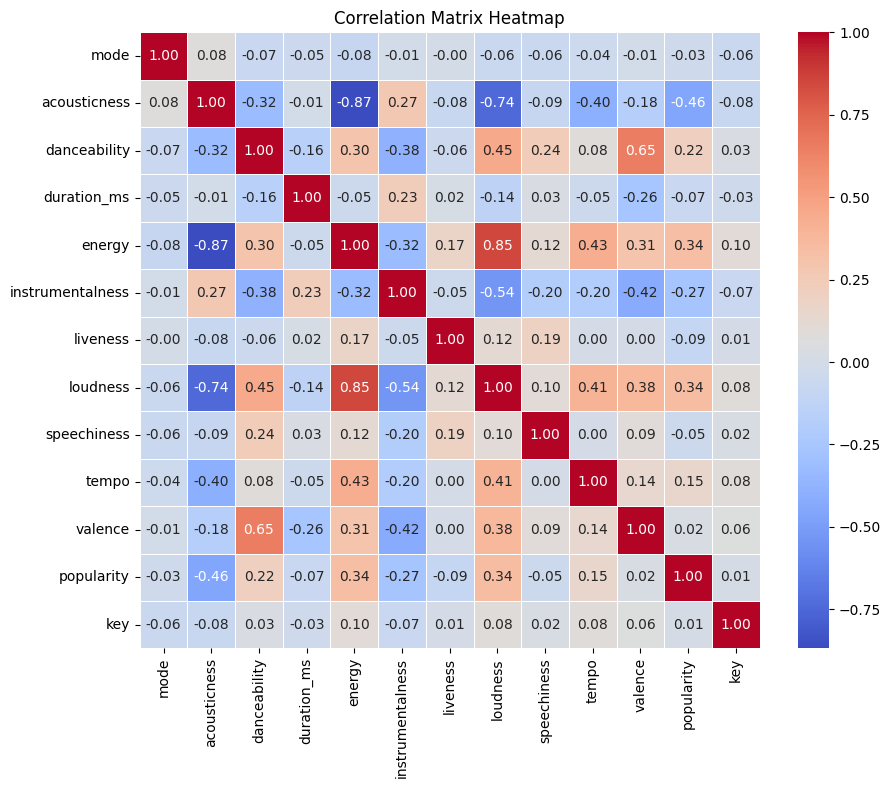

In [10]:
# Calculate the Pearson correlation matrix for the entire dataset
correlation_matrix = genre_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [11]:
# # Setting some color names and symbols for the graph
# colors = {
#     0:'red',
#     1:'blue',
#     # 2:'blue',
#     # 3:'green',
#     # 4:'yellow',
#     # 5:'olive',
#     # 6:'red',
#     # 7:'orange',
#     # 8:'black',
#     # 9:'cyan',
#     # 10:'aqua',
#     # 11:'maroon'
# }
# labelassigner = {
#     0:'+',
#     1:'.',
#     # 2:'<',
#     # 3:'>',
#     # 4:'x',
#     # 5:'^',
#     # 6:'o',
#     # 7:'s',
#     # 8:'D',
#     # 9:'v',
#     # 10:'*',
#     # 11:'|'
# }

In [12]:
# In this context, the straightforward K-means clustering algorithm is applied to categorize the genres
# within this dataset into ten clusters, leveraging the numerical audio features associated with each genre.
# Extract numeric features
numeric_features = genre_data.select_dtypes(np.number)

# Cluster pipeline
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=10))
])

# Fit and predict clusters
genre_data['cluster'] = cluster_pipeline.fit_predict(numeric_features)

# Visualizing the Clusters with t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, verbose=1))
])

# Transform features with t-SNE
genre_embedding = tsne_pipeline.fit_transform(numeric_features)

# Create DataFrame for visualization
projection = pd.DataFrame(data=genre_embedding, columns=['x', 'y'])
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

# Plotting with plotly express
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres']
)
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.007s...
[t-SNE] Computed neighbors for 2973 samples in 0.457s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106186
[t-SNE] KL divergence after 1000 iterations: 1.393316


In [13]:
# This data is used for Collaborative based filtering which is still pending
# Reading the playlist dataset
df_playlist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify playlists/spotify_dataset.csv', error_bad_lines=False, warn_bad_lines=False)

# Drop unnamed columns from the DataFrame
df_playlist = df_playlist.loc[:, ~df_playlist.columns.str.contains('^Unnamed')]

# Changing the column names for convenience
df_playlist.columns = df_playlist.columns.str.replace('"', '')
df_playlist.columns = df_playlist.columns.str.replace('name', '')
df_playlist.columns = df_playlist.columns.str.replace(' ', '')

# Displaying first 5 rows for reference
df_playlist.head()

,user_id,artist,track,playlist
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [14]:
# Keeping only those artist who have appeared for more than 50 times
df_playlist = df_playlist.groupby('artist').filter(lambda x : len(x) >= 50)

# Keeping only those user who have more than 10 unique artists in their playlists
df_playlist = df_playlist[df_playlist.groupby('user_id').artist.transform('nunique') >= 10]
print(df_playlist.columns)

Index(['user_id', 'artist', 'track', 'playlist'], dtype='object')


In [15]:
# Group by User ID and Artist to frequnecy count for each user and artist
size = lambda x: len(x)
df_freq = df_playlist.groupby(['user_id', 'artist']).agg('size').reset_index().rename(columns={0:'freq'})[['user_id', 'artist', 'freq']].sort_values(['freq'], ascending=False)
print(df_freq)

                                 user_id              artist  freq
104701  b26235eefbfaad98b38fa26f839b8592         Johnny Cash  1371
130315  db937456654d2465292c4daa947c95de         Johnny Cash   875
82621   8bc614867c796992a6e8f989a090d0a3  The Rolling Stones   667
135323  e27ddbfea5c7c4ea34569ea3a953180c        Bad Religion   659
37737   471eb5ca25761d4d041cd8779a76960c  The Rolling Stones   658
...                                  ...                 ...   ...
94461   a052ccdc8f194407c45d695474a8c971           Kari Jobe     1
39837   4919439594644d4bcd3b633629bbb2d7             Alvvays     1
94459   a052ccdc8f194407c45d695474a8c971          John Mayer     1
94458   a052ccdc8f194407c45d695474a8c971     Johannes Brahms     1
0       001c4e5b73eca68ee9756bb0c7d2f855             Aaliyah     1

[152964 rows x 3 columns]


In [16]:
# Creating a DF for Artist and artist ID
df_artist = pd.DataFrame(df_freq["artist"].unique())
df_artist = df_artist.reset_index()
df_artist = df_artist.rename(columns={'index':'artist_id', 0:'artist'})
df_artist.head()

,artist_id,artist
0,0,Johnny Cash
1,1,The Rolling Stones
2,2,Bad Religion
3,3,Andrés Calamaro
4,4,Pet Shop Boys


In [17]:
# This input is for Collaborative data filtering
# # Input from USER
user = [
    # {'artist': 'Sergei Rachmaninoff', 'freq': 50},
    {'artist': "Elvis Costello", 'freq': 48},
    # {'artist': 'The Breakers', 'freq': 10},
    # {'artist': 'Pink Floyd', 'freq': 51},
    # {'artist': 'The Rolling Stones', 'freq': 63}
]

# # user = [
# #             {'artist':'Ella Fitzgerald', 'freq': 40},
# #             {'artist':'Frank Sinatra', 'freq': 10},
# #             {'artist':'Johnny Cash', 'freq': 84},
# #             {'artist':"The Rolling Stones", 'freq':5},
# #             {'artist':'Louis Armstrong', 'freq':5}
# #          ]

# Converting into Dataframe
inputArtist = pd.DataFrame(user)

# Assuming df_artist is the dataframe you want to filter
# Filtering out the ID by Artist name
Id = df_artist[df_artist['artist'].isin(inputArtist['artist'].tolist())]

# Then merging it so we can get the artistID
inputArtist = pd.merge(Id, inputArtist)

print(inputArtist)

   artist_id          artist  freq
0        386  Elvis Costello    48


In [18]:
# Reference from Kaggle not created by our team
def ColFilter(inputArtist,df_freq):
    #Filtering out the movies by title
    Id = df_artist[df_artist['artist'].isin(inputArtist['artist'].tolist())]
    #Then merging it so we can get the movieId. It's implicitly merging it by title.
    inputArtist = pd.merge(Id, inputArtist)
    #Dropping information we won't use from the input dataframe
    #inputArtist = inputArtist.drop('year', 1)
    df_freq  = pd.merge(df_freq , df_artist, how='inner', on='artist')
    userSubsetGroup = df_freq.groupby(['user_id'])
    userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
    userSubsetGroup = userSubsetGroup[0:100]
    #Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
    pearsonCorDict = {}
    #For every user group in our subset
    for name, group in userSubsetGroup:
        #Let's start by sorting the input and current user group so the values aren't mixed up later on
        group = group.sort_values(by='artist_id')
        inputArtist = inputArtist.sort_values(by='artist_id')
        #Get the N for the formula
        n = len(group)
        #Get the review scores for the movies that they both have in common
        temp = inputArtist[inputArtist['artist_id'].isin(group['artist_id'].tolist())]
        #And then store them in a temporary buffer variable in a list format to facilitate future calculations
        tempRatingList = temp['freq'].tolist()
        #put the current user group reviews in a list format
        tempGroupList = group['freq'].tolist()
        #Now let's calculate the pearson correlation between two users, so called, x and y
        Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(n)
        Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(n)
        Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(n)
        #If the denominator is different than zero, then divide, else, 0 correlation.
        if Sxx != 0 and Syy != 0:
            pearsonCorDict[name] = Sxy/sqrt(Sxx*Syy)
        else:
            pearsonCorDict[name] = 0
    pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
    pearsonDF.columns = ['similarityIndex']
    pearsonDF['user_id'] = pearsonDF.index
    pearsonDF.index = range(len(pearsonDF))
    topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
    topUsersRating = topUsers.merge(df_freq, left_on='user_id', right_on='user_id', how='inner')
    topUsersRatings = topUsersRating
    topUsersRating['weightedFreq'] = topUsersRating['similarityIndex']*topUsersRating['freq']
    #Applies a sum to the topUsers after grouping it up by userId
    tempTopUsersRating = topUsersRating.groupby('artist_id').sum()[['similarityIndex','weightedFreq']]
    tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedFreq']
    #Creates an empty dataframe
    recommendation_df = pd.DataFrame()
    #Now we take the weighted average
    recommendation_df['weighted average freq score'] = tempTopUsersRating['sum_weightedFreq']/tempTopUsersRating['sum_similarityIndex']
    recommendation_df['artist_id'] = tempTopUsersRating.index
    # Sort the recomendation by the weighted average freq score
    recommendation_df = recommendation_df.sort_values(by='weighted average freq score', ascending=False)
    recommendation_final = df_artist.loc[df_artist['artist_id'].isin(recommendation_df.head(10)['artist_id'].tolist())]
    return recommendation_final,topUsersRatings

In [19]:
recommendation_final, topUsersRatings=ColFilter(inputArtist,df_freq)
recommendation_final

# Final recommendation
df_playlist_2  = pd.merge(df_playlist , df_artist, how='inner', on='artist')
df_playlist_2.head(10)

,user_id,artist,track,playlist,artist_id
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,386
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,386
2,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Tramp The Dirt Down,HARD ROCK 2010,386
3,c50566d83fba17b20697039d5824db78,Elvis Costello,Don't Let Me Be Misunderstood,Everything at once,386
4,650c4d63a819dbb77cc15a87f407039a,Elvis Costello,Alison,Home,386
5,424678a7d04868568c9f95863a901d88,Elvis Costello,Beautiful,Ángeles,386
6,22f7b61f45b2af0cf9a33707f3710900,Elvis Costello,Watching The Detectives - Single Version,Vergaarbaak,386
7,22f7b61f45b2af0cf9a33707f3710900,Elvis Costello,She,Voorbeschouwing,386
8,44e913174d11e8bb58d7f179573950fb,Elvis Costello,Deep Dark Truthful Mirror,We Are Hunted Paramore Chart Jan 12,386
9,8b1da91c01a055bf8c6a3f01fad469fe,Elvis Costello,Alison,All Time Great Songs,386


In [20]:
# Content based filtering
data['song_id'] = data.index
df = data[['danceability','energy',"valence","speechiness","instrumentalness","acousticness"]]
df.index = data['song_id']
# normalized  data by columns
df_normalized = pd.DataFrame(normalize(df, axis=1))
df_normalized.columns = df.columns
df_normalized.index = df.index
df_normalized.head(10)

,danceability,energy,valence,speechiness,instrumentalness,acousticness
song_id,,,,,,
0,0.204439,0.154611,0.043526,0.026819,0.643359,0.719566
1,0.526206,0.219092,0.618725,0.266637,0.000000,0.470308
2,0.238274,0.120590,0.028622,0.024627,0.663245,0.698114
3,0.258165,0.290084,0.154899,0.033233,0.000026,0.907802
4,0.382654,0.176680,0.231606,0.034787,0.000002,0.876076
5,0.692751,0.343891,0.194805,0.069573,0.166976,0.575470
6,0.427215,0.167422,0.334844,0.050721,0.000000,0.821440
7,0.325268,0.073582,0.061124,0.038129,0.440659,0.830311
8,0.362596,0.097191,0.539034,0.036110,0.112891,0.744629


In [21]:
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cosine, cityblock, euclidean, jaccard

# Setting the song_id and number of recommendation we want
song_id = 99
N = 6

print('Recommendation are for this song:\n', data.loc[song_id, 'name'])

# Content based filtering
data['song_id'] = data.index
df = data[['danceability', 'energy', 'valence', 'speechiness', 'instrumentalness', 'acousticness']]
df.index = data['song_id']

# normalized data by columns
df_normalized = pd.DataFrame(normalize(df, axis=1))
df_normalized.columns = df.columns
df_normalized.index = df.index

def content_filter_music_recommender(song_id, N, distance_method):
    allSongs = pd.DataFrame(df_normalized.index)
    allSongs = allSongs[allSongs.song_id != song_id]

    # Reshape the input arrays to 2D
    song_vector = df_normalized.loc[song_id].values.flatten().reshape(1, -1)

    # Calculate distances using the specified distance method
    allSongs["distance"] = allSongs["song_id"].apply(lambda x: distance_method(song_vector.flatten(), df_normalized.loc[x].values.flatten()))

    # sort by distance then song_id
    TopNRecommendation = allSongs.sort_values(["distance", "song_id"]).head(N)

    # merge with original data to get song names
    Recommendation = pd.merge(TopNRecommendation, data, how='inner', on='song_id')

    SongName = Recommendation['name']
    return SongName

# Using Cosine Similarity
SongName_cosine = content_filter_music_recommender(song_id, N, distance_method=cosine)
print("\nRecommended songs using Cosine Similarity are:\n", SongName_cosine)

# Using Manhattan Distance
SongName_manhattan = content_filter_music_recommender(song_id, N, distance_method=cityblock)
print("\n\nRecommended songs using Manhattan Distance are:\n", SongName_manhattan)

# Using Euclidean Distance
SongName_euclidean = content_filter_music_recommender(song_id, N, distance_method=euclidean)
print("\n\nRecommended songs using Euclidean Distance are:\n", SongName_euclidean)

# Using Jaccard Distance
SongName_jaccard = content_filter_music_recommender(song_id, N, distance_method=jaccard)
print("\n\nRecommended songs using Jaccard Distance are:\n", SongName_jaccard)

Recommendation are for this song:
 Don't Run

Recommended songs using Cosine Similarity are:
 0                     Pause Track - Live
1                     Pause Track - Live
2    StaggerLee Has His Day at the Beach
3                            Pause Track
4                           Hava Nagilah
5                            Pause Track
Name: name, dtype: object


Recommended songs using Manhattan Distance are:
 0    Never as Tired as When I'm Waking Up
1                            Forever Girl
2                  Merry, Merry Christmas
3                              Take a Bow
4                  Alibis - 2007 Remaster
5                            Penitentiary
Name: name, dtype: object


Recommended songs using Euclidean Distance are:
 0    Never as Tired as When I'm Waking Up
1                            Forever Girl
2                            Penitentiary
3                  Merry, Merry Christmas
4                  Alibis - 2007 Remaster
5                              Take a Bow
Na